<a href="https://colab.research.google.com/github/NileshSurve123/CodSoft/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import nltk
nltk.download('stopwords')
%pip install langdetect

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=e1d698d7bf1de5b9488a25b02c3920fbed8bdeb32ad9c4486a8fca6808f5638c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
%pip install X_train_transformed-contrip-python

ERROR: Could not find a version that satisfies the requirement X_train_transformed-contrip-python (from versions: none)
ERROR: No matching distribution found for X_train_transformed-contrip-python


In [ ]:
%pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
%pip install tfIdfInheritVectorizer

  Preparing metadata (setup.py) ... done
  Created wheel for tfIdfInheritVectorizer: filename=tfIdfInheritVectorizer-0.1-py3-none-any.whl size=5445 sha256=ed14027272cc9c36b7c13dd814b542141ac6bd469b26a49cf9aaf50a4e86b56c
  Stored in directory: /root/.cache/pip/wheels/08/c6/7c/ebca9cd502a98191beb4c5fcc6b8596c246e6a62dffd635f16
Successfully built tfIdfInheritVectorizer


In [ ]:
%pip install tfidf

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tfidf: filename=tfidf-0.0.6-py3-none-any.whl size=2405 sha256=7edc9ed552f6ee277b91a830c88181febbb77e3181d006fca29dcd0c483593cc
  Stored in directory: /root/.cache/pip/wheels/07/b0/05/517232ac6f341ebb1014ac6083c32a6efe80749815fac25370
  Created wheel for etl_utils: filename=etl_utils-0.1.11-py3-none-any.whl size=21638 sha256=7ffdba34c42e97edce5776ac267b47188ab096ebe4cf2127b25a51f43717d809
  Stored in directory: /root/.cache/pip/wheels/3e/18/28/9bc1a544b8ae3c926030294407dbe144194289017286da9c44
  Created wheel for humanize: filename=humanize-0.5.1-py3-none-any.whl size=17666 sha256=eeb052b63293419b4f323718d81cd8cd8e8aa646f57e1a3abad37808945ed53e
  Stored in directory: /root/.cache/pip/wheels/9e/6c/17/33731af3b3866ad0114629d28723aba175c25f3ed5eb20b228
  Created wheel 

In [ ]:
with open("train_data.txt", encoding="utf8") as f:
    train_content = f.readlines()

with open("test_data_solution.txt", encoding="utf8") as f:
    content_test = f.readlines()

train = pd.DataFrame([element.split(":::") for element in train_content], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

test = pd.DataFrame([element.split(":::") for element in content_test], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

In [ ]:
train.to_csv("train_data.csv", index=False)
test.to_csv("test_data.csv", index=False)

In [ ]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION
3296,Um Homem Diabólico (1988),action,The servant Juarez kills his boss to marry hi...
4396,The Score (2005),drama,Dr. Magnusson is a brilliant geneticist racin...
359,Cinq tulipes rouges (1949),crime,"During the Tour de France, five champions, al..."
2734,Getting Away with Murder: The JonBenet Ramsey...,drama,"Six-year-old JonBenét Ramsey, whose body was ..."
2682,El Noom fi el Asal (1996),drama,Officer Magdy investigates the suicide of a g...


In [ ]:
train.shape, test.shape

((4762, 3), (4817, 3))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        4762 non-null   object
 1   GENRE        4762 non-null   object
 2   DESCRIPTION  4762 non-null   object
dtypes: object(3)
memory usage: 111.7+ KB


In [ ]:
train.duplicated().sum()

0

In [ ]:
train.describe()

,TITLE,GENRE,DESCRIPTION
count,4762,4762,4762
unique,4762,27,4760
top,Oscar et la dame rose (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,1188,2


In [ ]:
train.loc[train['DESCRIPTION'].str.contains(r'@\S+')].head()

,TITLE,GENRE,DESCRIPTION
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...


In [ ]:
train.loc[train['DESCRIPTION'].str.contains(r'http\S+')].head()

,TITLE,GENRE,DESCRIPTION


In [ ]:
from langdetect import detect
lang_count=0
def detect_language(text):


    global lang_count
    lang_count=lang_count+1
    print(lang_count)


    try:
        return detect(text)
    except:
        return 'Unknown'

In [ ]:
train['Language'] = train['DESCRIPTION'].apply(detect_language)
test['Language'] = test['DESCRIPTION'].apply(detect_language)

Streaming output truncated to the last 5000 lines.
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769

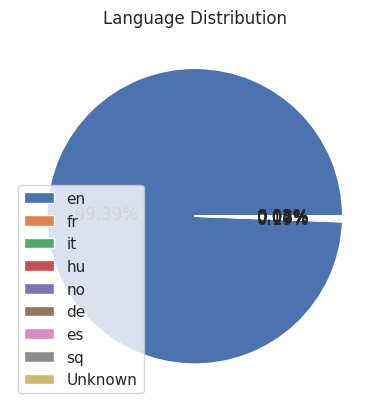

In [ ]:
plt.pie(train.Language.value_counts().values.tolist(),autopct='%.2f%%')
plt.legend(labels=train.Language.value_counts().index.tolist(),loc='lower left')
plt.title('Language Distribution')
plt.show()

In [ ]:
train["Language"].value_counts()

en         4733
fr            9
it            8
hu            4
no            2
de            2
es            2
sq            1
Unknown       1
Name: Language, dtype: int64

In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk
stopwd = stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ', '', text) # Removing unknown mail
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'@\S+', '', text) # Removing mentions
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations
    text = re.sub(f'[{string.digits}]', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters

    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

In [ ]:
clean_text(train["DESCRIPTION"][0])


'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

In [ ]:
train["clean_description"]=train["DESCRIPTION"].apply(clean_text)
test["clean_description"]=test["DESCRIPTION"].apply(clean_text)

In [ ]:
train.head(5)["clean_description"]

0    listening conversation doctor parents year old...
1    brother sister past incestuous relationship cu...
2    bus empties students field trip museum natural...
3    help unemployed father make ends meet edith tw...
4    films title refers recovered bodies ground zer...
Name: clean_description, dtype: object

In [ ]:
train["len_desc"] = train["DESCRIPTION"].apply(len)
train["len_clean_desc"] = train["clean_description"].apply(len)

In [ ]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION,Language,clean_description,len_desc,len_clean_desc
2556,Swans (1990),animation,"Once upon a time, there lived a widowed King ...",en,upon time lived widowed king children sons dau...,1251,765
4499,False Face (2009),thriller,Ted's gambling problem is taking a toll on hi...,en,teds gambling problem taking toll relationship...,526,327
4587,Naked Sushi (2009),short,What happens when an idealistic filmmaker and...,en,happens idealistic filmmaker heroic narcissist...,222,164
2743,Il figlio del fattore (1909),short,The son of an old farmer had just returned fr...,en,son old farmer returned military school learni...,1204,723
2627,Flying Naked (2006),short,Marisa and Sean have never spoken...in real l...,en,marisa sean never spokenin real life every nig...,327,217


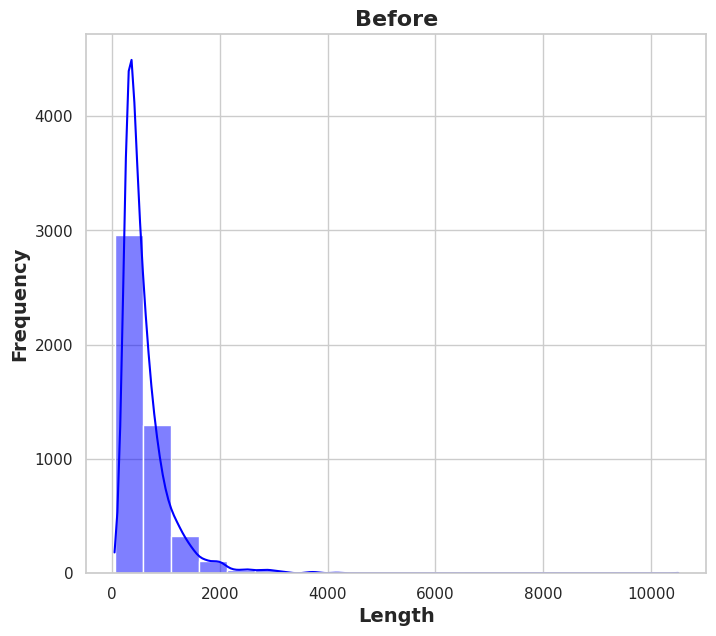

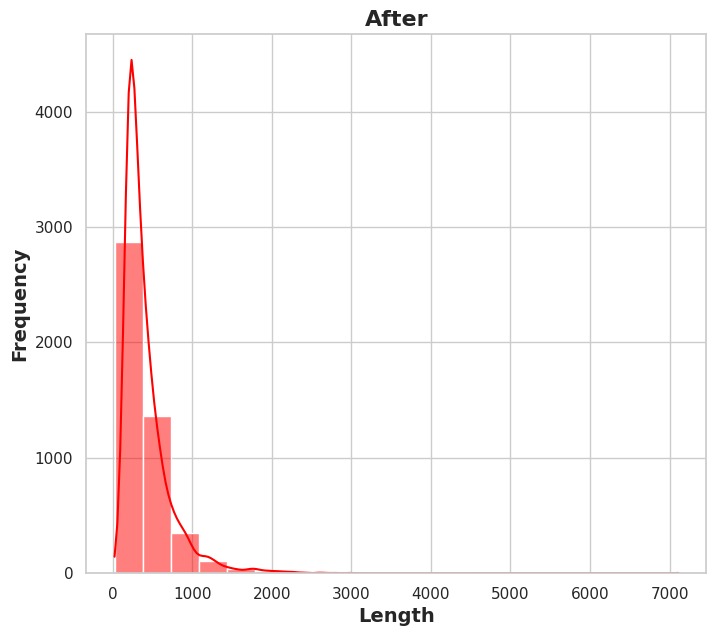

In [ ]:
plt.figure(figsize=(8, 7))
sns.histplot(data=train, x='len_desc', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Before', fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(8, 7))
sns.histplot(data=train, x='len_clean_desc', bins=20, kde=True, color='red')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('After', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
(train["len_clean_desc"]>2000).value_counts()

False    4741
True       21
Name: len_clean_desc, dtype: int64

In [ ]:
train["clean_description"] = train["clean_description"].apply(lambda x: x[:np.random.randint(250,2000)] if len(x)>2000 else x)

In [ ]:
train["len_clean_desc"] = train["clean_description"].apply(len)
(train["len_clean_desc"]>2000).value_counts()

False    4741
True       21
Name: len_clean_desc, dtype: int64

In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator()

def trans(text):
    try:
        return translator.translate(text)
    except Exception as e:
        return text

train["clean_description"] = train.apply(lambda x: trans(x["clean_description"]) if x['Language']!='en' else x['clean_description'],axis=1)

In [ ]:
train[train["Language"]!="en"].iloc[0]

TITLE                                  Divorzio alla siciliana (1963) 
GENRE                                                          comedy 
DESCRIPTION           Il barone Fifě ha bisogno di un erede per ave...
Language                                                            it
clean_description    Baron Fifě needs an heir to have his father's ...
len_desc                                                           645
len_clean_desc                                                     518
Name: 210, dtype: object

In [ ]:
detect_language(train[train["Language"]!="en"].iloc[0]["clean_description"])
108415

9580


108415

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
lam_cnt = 0
def lametize(text):


    global lam_cnt
    lam_cnt=lam_cnt+1
    print(lam_cnt)


    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
lametize("I am going to the store")

1


'I be go to the store'

In [ ]:
train["clean_description"] = train["clean_description"].apply(lambda x: lametize(x))

Streaming output truncated to the last 5000 lines.
49216
49217
49218
49219
49220
49221
49222
49223
49224
49225
49226
49227
49228
49229
49230
49231
49232
49233
49234
49235
49236
49237
49238
49239
49240
49241
49242
49243
49244
49245
49246
49247
49248
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
4

In [ ]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION,Language,clean_description,len_desc,len_clean_desc
2393,Ne Plu Pikniko (1989),short,"Mythological mayhem, existential angst and a ...",en,mythological mayhem existential angst critical...,382,295
4133,Aapne to dhirubhai (2014),comedy,This laughter-riot is a story of young lad Dh...,en,laughter riot story young lad dhirendra vrajes...,599,399
2106,Can Tropical Rainforests Be Saved? (1991),documentary,The first global look at this global issue. I...,en,first global look global issue filmed dozen ra...,602,443
100,Piigs (2017),documentary,PIIGS is a documentary that challenges preval...,en,piigs documentary challenges prevalent europea...,1201,904
2354,The Devil on Wheels (1947),drama,American-International did not invent the juv...,en,american international invent juvenile delinqu...,803,557


In [ ]:
train.drop(columns=["len_desc","len_clean_desc","Language","DESCRIPTION"],inplace=True)

In [ ]:
train["input"] = train["TITLE"]+" "+train["clean_description"]
test["input"] = test["TITLE"]+" "+test["clean_description"]

In [ ]:
train["GENRE"].unique(),train["GENRE"].unique().shape

(array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
        ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
        ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
        ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
        ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
        ' musical ', ' war '], dtype=object),
 (27,))

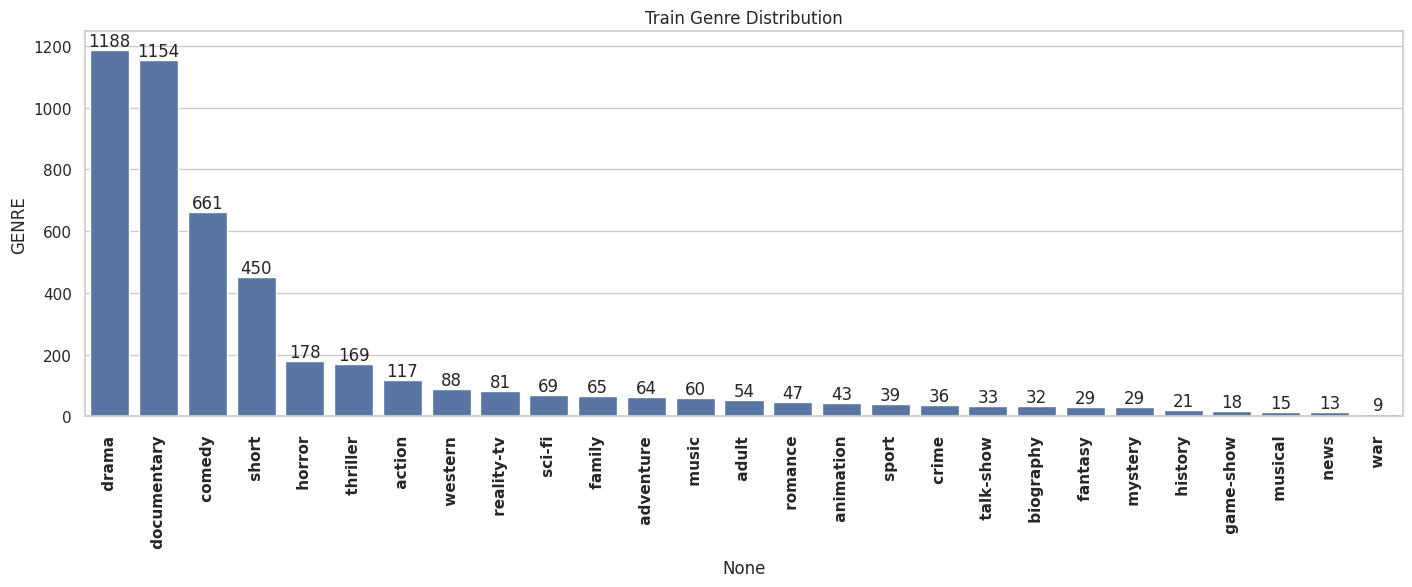

In [ ]:
plt.subplots(figsize=(17, 5))
ax1 = sns.barplot(x=train["GENRE"].value_counts().index,
            y=train["GENRE"].value_counts())
ax1.bar_label(ax1.containers[0])
plt.title("Train Genre Distribution")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',max_features=35000)

In [ ]:
X_train_transformed = tfidf.fit_transform(train["GENRE"])
X_test_transformed = tfidf.transform(test["GENRE"])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_transformed, train['GENRE'])

In [ ]:
plt.subplots(figsize=(17, 5))
sns.countplot(data=y_train_resampled,x=y_train_resampled.values)
plt.title("Train Genre Distribution")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

In [ ]:
x_train_resampled.shape, y_train_resampled.shape

((32076, 29), (32076,))

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train_resampled)
y_test = encoder.transform(test["GENRE"])

In [ ]:
%pip install tfidf

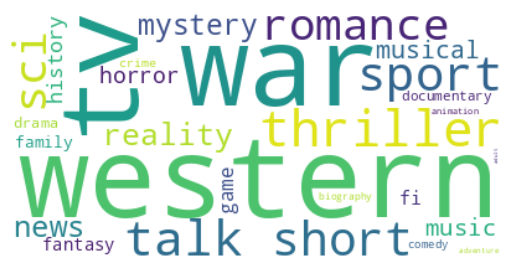

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    max_words=200, background_color="white").generate_from_frequencies(tfidf.vocabulary_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


mnb = MultinomialNB(alpha=0.5)
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500,
                         random_state=42, tol=0.1, n_jobs=4)
svc = LinearSVC()
rdmfr = RandomForestClassifier(n_estimators=100, random_state=42)
dcst = DecisionTreeClassifier()

In [ ]:
x_train_resampled.shape,y_train.shape

((32076, 29), (32076,))

In [ ]:
lgc.fit(x_train_resampled, y_train)
lgc.score(X_test_transformed, y_test)

1.0

In [ ]:
bnb.fit(x_train_resampled, y_train)
bnb.score(X_test_transformed, y_test)

1.0

In [ ]:
mnb.fit(x_train_resampled, y_train)
mnb.score(X_test_transformed, y_test)

1.0

In [ ]:
rdmfr.fit(x_train_resampled, y_train)
rdmfr.score(X_test_transformed, y_test)

1.0

In [ ]:
svc.fit(x_train_resampled,y_train)
svc.score(X_test_transformed,y_test)

1.0

In [ ]:
ypred_test_lgc = lgc.predict(X_test_transformed)
ypred_train_lgc = lgc.predict(x_train_resampled)

ypred_test_bnb = bnb.predict(X_test_transformed)
ypred_train_bnb = bnb.predict(x_train_resampled)

ypred_test_mnb = mnb.predict(X_test_transformed)
ypred_train_mnb = mnb.predict(x_train_resampled)

ypred_test_rdmfr = rdmfr.predict(X_test_transformed)
ypred_train_rdmfr = rdmfr.predict(x_train_resampled)

ypred_test_svc = svc.predict(X_test_transformed)
ypred_train_svc = svc.predict(x_train_resampled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_lgc))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_lgc))

print("\n\nBernoulliNB : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_bnb))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_bnb))

print("\n\nMultinomialNB : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_mnb))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_mnb))

print("\n\nRandom Forest : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_rdmfr))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_rdmfr))

print("\n\nSupport Vector : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_svc))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_svc))

Logistic Regression : 
Train accuracy:  1.0
Test accuracy:  1.0


BernoulliNB : 
Train accuracy:  1.0
Test accuracy:  1.0


MultinomialNB : 
Train accuracy:  1.0
Test accuracy:  1.0


Random Forest : 
Train accuracy:  1.0
Test accuracy:  1.0


Support Vector : 
Train accuracy:  1.0
Test accuracy:  1.0
